In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
url = '../../Datasets/house-prices-advanced-regression-techniques/train.csv'
train = pd.read_csv(url, sep=",")
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [3]:
y_train = train.SalePrice
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

**Mostly correlated columns with SalePrice**

In [4]:
corr_abs = train.corr().abs().sort_values(by=['SalePrice'], ascending=False)
mostly_corr = corr_abs[corr_abs.iloc[:,-1] > 0.5]
mostly_corr.columns
train[mostly_corr.columns].isnull().any()
#mostly_corr.isnull().any()

Id               False
MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

**cleaning NaN values**

In [6]:
train[mostly_corr.columns] = train[mostly_corr.columns].fillna(0)

In [7]:
train[mostly_corr.columns].isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [8]:
del train[mostly_corr.columns]['SalePrice']

**removing SalePrice, lets check if NaN values exist** 

In [20]:
mostly_corr.isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [21]:
cols = train[mostly_corr.columns].columns #['YearBuilt','1stFlrSF','2ndFlrSF','LotArea','YrSold','FullBath','MSSubClass','TotRmsAbvGrd','BedroomAbvGr']

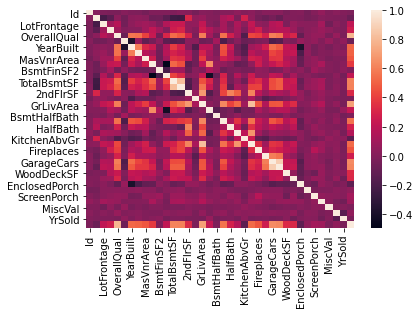

In [22]:
sns.heatmap(train[mostly_corr.columns].corr())

In [11]:
cols = cols[:-1]

In [12]:
X_train = train[cols]
X_train.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  WoodDeckSF  \
0          2003       196.0         706  ...         548           0   
1          1976         0.0         978  ...         460         298   
2          2002       162.0         486  ...         608           0   
3          1970         0.0         216  ...         642           0   
4          2000       350.0         655  ...         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008  

[5 rows x 37 columns]

**NaN values fixed and SalePrice column removed**

In [15]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.predict(X_train.head())

array([227286.82182012, 196557.96053216, 222772.94061721, 199845.35839671,
       295401.28951978])

In [16]:
test_url = '../../Datasets/house-prices-advanced-regression-techniques/test.csv'
test = pd.read_csv(test_url)
test_cols = test[cols]
print(test_cols.head())
test_predictions = model.predict(test_cols.fillna(0))
print(test_predictions)

     Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0       1961          1961         0.0       468.0  ...       730.0   
1       1958          1958       108.0       923.0  ...       312.0   
2       1997          1998         0.0       791.0  ...       482.0   
3       1998          1998        20.0       602.0  ...       470.0   
4       1992          1992         0.0       263.0  ...       506.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         140            0              0          0          120  

In [24]:
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
#print(np.mean(np.abs(y_train - train_predictions)))
#print("Test MAE:", mean_absolute_error(y_test, test_predictions))

NameError: name 'train_predictions' is not defined

In [17]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)